In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df=pd.read_csv("afterDJIA.csv")

In [3]:
len(df)

7420

In [4]:
df['cash']=0
df['action']=""
df['action1']=""
class Portfolio:
    def __init__(self):
        self.profit=0
        self.last_action=None
        self.last_price=0
        self.last_quantity=0
        self.brok_rate=0.0010
        self.capital=2000000
        self.margin=2000000
        
    def long(self,t):
        df['cash'][t]=self.margin
        self.last_quantity=self.margin//df['Open'][t]
        self.margin=self.margin%df['Open'][t]
        self.last_price=df['Open'][t]
        self.last_action='bought'
        print('open long @',self.last_price)
        df['action'][t]="long"
        df['action1'][t]="long"
        
    def close_long(self,t):
        tbrokerage=(df['Open'][t]+self.last_price)*self.brok_rate
        tprofit=(df['Open'][t]-self.last_price-tbrokerage)*self.last_quantity
        self.profit=self.profit+tprofit
        self.margin=self.margin+(self.last_quantity*self.last_price)+(tprofit)
        df['cash'][t]=self.margin        
        print('close long @',df['Open'][t])
        self.last_action=None
        df['action'][t]="close long"
        df['action1'][t]="short"
        
    def short(self,t):
        df['cash'][t]=self.margin        
        self.last_quantity=self.margin//df['Open'][t]
        self.margin=self.margin%df['Open'][t]
        self.last_price=df['Open'][t]
        self.last_action='sold'        
        print('open short @',self.last_price)
        df['action'][t]="short"
        df['action1'][t]="short"
        
    def close_short(self,t):
        tbrokerage=(df['Open'][t]+self.last_price)*self.brok_rate
        tprofit=(self.last_price-df['Open'][t]-tbrokerage)*self.last_quantity
        self.profit=self.profit+tprofit
        self.margin=self.margin+(self.last_quantity*self.last_price)+(tprofit)
        df['cash'][t]=self.margin      
        print('close short @',df['Open'][t])
        self.last_action=None
        df['action'][t]="close short"
        df['action1'][t]="long"
        
    def copy_Buy(self,t):
        df['cash'][t]=self.margin+(self.last_quantity*df['Close'][t])
        
    def copy_Sell(self,t):
        tp=(self.last_price-df['Close'][t])*self.last_quantity
        original=self.margin+(self.last_quantity*self.last_price)
        df['cash'][t]=original+tp
        
    def copy_None(self,t):
        df['cash'][t]=self.margin       
        
        
        
    def action(self,signal,t):
        if signal=='Buy' and self.last_action==None:
            self.long(t)
        elif signal=='Buy' and self.last_action=='sold':
            self.close_short(t)
            
        elif signal=='Buy' and self.last_action=='bought':
            self.copy_Buy(t)            
        elif signal=='Sell' and self.last_action==None:
            self.short(t)
        elif signal=='Sell' and self.last_action=='bought':
            self.close_long(t)
            
        elif signal=='Sell' and self.last_action=='sold':
            self.copy_Sell(t)
        elif signal=='hold':
            if self.last_action==None:
                self.copy_None(t)
            elif self.last_action=='bought':
                self.copy_Buy(t)                
            elif self.last_action=='sold':
                self.copy_Sell(t)  
                
        
    def result(self,t):        
        if self.last_action=='sold':
            tbrokerage=(df['Close'][t]+self.last_price)*self.brok_rate
            tprofit=(self.last_price-df['Close'][t]-tbrokerage)*self.last_quantity
            self.profit=self.profit+tprofit
            self.margin=self.margin+(self.last_quantity*self.last_price)+(tprofit) 
            df['cash'][t]=self.margin
            self.last_action=None
            df['action'][t]="close short"
            df['action1'][t]="long"
        elif self.last_action=='bought':
            tbrokerage=(df['Close'][t]+self.last_price)*self.brok_rate
            tprofit=(df['Close'][t]-self.last_price-tbrokerage)*self.last_quantity
            self.profit=self.profit+tprofit
            self.margin=self.margin+(self.last_quantity*self.last_price)+(tprofit) 
            df['cash'][t]=self.margin
            self.last_action=None
            df['action'][t]="close long"
            df['action1'][t]="short"
        print("\n***********************")
        print("Profit is ",self.profit)
        print("Initial Capital is ",self.capital)    
        print("Current Capital is ",self.margin)
        roi=((self.margin-self.capital)/self.capital)*100
        print("%ROI is ",roi)
        
        

In [5]:
    agent=Portfolio()
    for i in range(7049,7419):  
        t=df['y_pred'][i]
        #print(i,t)
        #print("p={}ta={}".format(t,z3))
        if (t==1):
            agent.action('Buy',i+1)    
            print("buy")
        elif (t==0):
            agent.action('Sell',i+1)  
            print("sell")
        else:
            agent.action('hold',i+1)        
    agent.result(i)
    bnh=((df['Close'][7419]-df['Close'][7049])/df['Close'][7049])*100
    print("Buy and Hold=",bnh)

/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: Setti

open long @ 24519.19921875
buy
close long @ 24806.970703125
sell
open short @ 24789.48046875


/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to 

sell
close short @ 24802.900390625
buy
open long @ 24926.0703125
buy
buy
buy
buy
buy
close long @ 25041.140625
sell
open long @ 25036.900390625
buy
buy
buy
buy
buy
buy
buy
buy
buy
buy
close long @ 25437.4296875
sell
open short @ 25551.650390625
sell
close short @ 25615.720703125
buy
open long @ 25589.7890625
buy
buy
close long @ 25327.189453125
sell
open long @ 25215.689453125
buy
close long @ 25235.369140625
sell
open long @ 25294.970703125
buy
buy
buy
buy
buy
close long @ 25714.859375
sell
open long @ 25688.580078125
buy
buy
close long @ 26092.69921875
sell
open short @ 26082.529296875
sell
close short @ 26099.009765625
buy
open long @ 25964.849609375
buy
buy
buy
buy
buy
buy
buy
close long @ 25989.0703125
sell
open long @ 26083.939453125
buy
buy
buy
close long @ 26076.2109375
sell
open short @ 26287.83984375
sell
sell
sell
sell
sell
sell


/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


close short @ 26418.26953125
buy
open long @ 26407.66015625
buy
close long @ 26598.359375
sell
open long @ 26648.91015625
buy
buy
close long @ 26784.080078125
sell
open short @ 26632.76953125
sell
sell
sell
sell
sell
close short @ 25332.4609375
buy
open short @ 25351.529296875
sell
close short @ 25705.869140625
buy
open long @ 25645.560546875
buy
buy
buy
close long @ 25038.4609375
sell
open long @ 25172.880859375
buy
buy
buy
buy
buy
buy
buy
buy
buy
buy
buy
close long @ 26139.58984375
sell
open short @ 26149.109375
sell
close short @ 25959.330078125
buy
open long @ 25321.2109375
buy
buy
close long @ 25061.48046875
sell
open short @ 25242.349609375
sell
close short @ 25392.609375
buy
open long @ 24618.6796875
buy
buy
buy
buy
buy
buy
buy
buy
buy
close long @ 25752.560546875
sell
open long @ 24737.419921875
buy
close long @ 24918.8203125
sell
open long @ 24360.94921875
buy
buy
buy
buy
close long @ 24408.0390625
sell
open long @ 23986.830078125
buy
buy
close long @ 23693.330078125
sell
open

In [6]:
#0-hold 1-buy 2-sell

In [7]:
len(df)

7420

In [8]:
#df.iloc[6028]

In [13]:
df.to_csv('cnn.csv')

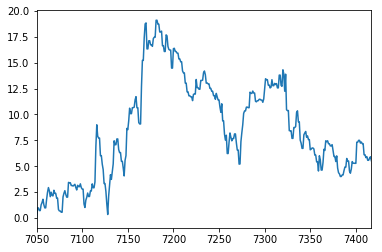

In [18]:
(((df['cash'].iloc[7050:-2]-2000000)/2000000)*100).plot()

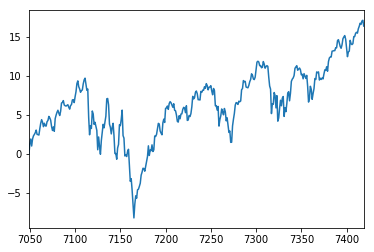

In [19]:
(((df['Close'].iloc[7049:]-24457)/24457)*100).plot()

In [12]:
df.Close.iloc[7049]

24456.48046875